# Understanding the decision tree structure


In [ ]:
- Binary tree

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
iris = load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=42) # ❓
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)

## Tree structure

`tree_` attr.
- `node_count`
- `max_depth`
- `compute_node_depths()`
- `threshold` ：Split value
- `value`: [n_nodes, n_classes, n_outputs] 

Traverse this tree.

In [28]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

In [29]:
print(f"The binary tree has {n_nodes} nodes.")

The binary tree has 5 nodes.


In [30]:
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
node_depth = np.zeros(shape=n_nodes,dtype=int)
stack = [(0,0)] # 
while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    is_split_node = children_left[node_id] != children_right[node_id]
    if is_split_node:
        stack.append((children_left[node_id], depth+1))
        stack.append((children_right[node_id], depth+1))
    else:
        is_leaves[node_id] = True

In [31]:
for i in range(n_nodes):
    if is_leaves[i]:
        print(f"{node_depth[i] * '\t'}NODE={i} is a leaf node with value={np.round(values[i])}")
    else:
        print("{space}node={node} is a split node with value={value}. go to node {left} if x[:, {feature}] <= {threshold} else to node{right}".format(
            space=node_depth[i]*'\t',
            node=i,
            left=children_left[i],
            feature=feature[i],
            threshold=np.round(threshold[i],2),
            right=children_right[i],
            value= np.round(values[i], 2)
        ))

node=0 is a split node with value=[[0.31 0.35 0.34]]. go to node 1 if x[:, 2] <= 2.45 else to node2
	NODE=1 is a leaf node with value=[[1. 0. 0.]]
	node=2 is a split node with value=[[0.   0.51 0.49]]. go to node 3 if x[:, 2] <= 4.75 else to node4
		NODE=3 is a leaf node with value=[[0. 1. 0.]]
		NODE=4 is a leaf node with value=[[0. 0. 1.]]


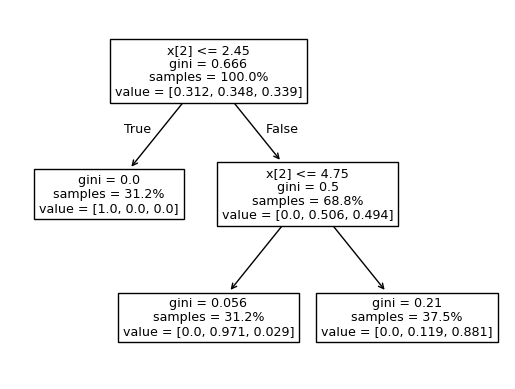

In [34]:
_ = tree.plot_tree(clf, proportion=True) #proportion 显示样本数百分比

Value: 节点上共类多少样本数比例

# Decision path
- `decision_path` is sparse matrix. `[i,j]=True` presents it's in path
- `apply` return the final decision leaf node.
  

In [43]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)